<a href="https://www.kaggle.com/code/azminetoushikwasi/investment-and-financial-analysis-epz?scriptVersionId=103161169" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="padding:20px;color:white;margin:0;font-size:300%;text-align:center;display:fill;border-radius:5px;background-color:#282c5c;overflow:hidden;font-weight:500">Export Processing Zones of Bangladesh</br>Exploratory Data Analysis + Statistical Analytics</div>

EDA is the process of investigating the dataset to discover patterns, and anomalies (outliers), and form hypotheses based on our understanding of the dataset. EDA involves generating summary statistics for numerical data in the dataset and creating various graphical representations to understand the data better.

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#282f85;overflow:hidden;font-weight:500">Introduction</div>

# 1. Introduction
The objective of this notebook is to present an extensive analysis of the Export Processing Zones of Bangladesh and to present some suggestions.

An Export Processing Zone (EPZ) is a Customs area where one is allowed to import plant, machinery, equipment and material for the manufacture of export goods under security, without payment of duty. Export processing zones (EPZs) are designated parts of Kenya that are aimed at promoting and facilitating export oriented investments and to develop an enabling environment for such investments.

At present there are 8 EPZs in Bangladesh. These are: Dhaka Export Processing Zone, Savar, Dhaka. Adamjee Export Processing Zone, Siddhirganj, Narayanganj.

The Bangladesh Export Processing Zones Authority is an agency of the Government of Bangladesh and is administered under the jurisdiction of the Prime Minister's Office. Its objective is to manage the various export processing zones in Bangladesh.

## Dataset Source :

- [Kaggle Dataset URL](https://www.kaggle.com/datasets/azminetoushikwasi/-epzs-of-bangladesh-investors-data)

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#282f85;overflow:hidden;font-weight:500">Dataset Observations</div>

# 2. Dataset Observations

## 2.1. Primary Observation Insights
- Location and Country data available
- Categorical Data on Products
- Total investment and Export Earned in July-September, 2020 (US$ Million) are provided of all 8 zones

![MAP](https://www.bepza.gov.bd/public/ckfinder/userfiles/images/image-20210305212745-2.jpeg)

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#282f85;overflow:hidden;font-weight:500">Data, Libraries & Configurations</div>

# 3. Data, Libraries & Configurations

## 3.1. Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
import json

from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer

## 3.2. Configurations

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
warnings.filterwarnings('ignore')

/kaggle/input/country-names-with-short-codes-a2-a3-iso/country code.csv
/kaggle/input/-epzs-of-bangladesh-investors-data/zonal-data.csv
/kaggle/input/-epzs-of-bangladesh-investors-data/IncentivesForDevelopers.csv
/kaggle/input/-epzs-of-bangladesh-investors-data/data.csv
/kaggle/input/-epzs-of-bangladesh-investors-data/BSMSN/BANGABANDHU SHEIKH MUJIB SHILPA NAGAR.txt


## 3.3. Data Loading

In [3]:
df=pd.read_csv("/kaggle/input/-epzs-of-bangladesh-investors-data/data.csv")
zdf=pd.read_csv("/kaggle/input/-epzs-of-bangladesh-investors-data/zonal-data.csv")
cc=pd.read_csv("/kaggle/input/country-names-with-short-codes-a2-a3-iso/country code.csv",encoding = "ISO-8859-1")

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#282f85;overflow:hidden;font-weight:500">Descriptive Analysis</div>

# 4. Descriptive Analysis

## 4.1. Dataset with 'data.csv'

### 4.1.1. Basic Exploration: 

In [4]:
df.head()

,Zone,NameOfEnterprise,InvestingCountry,Products
0,Adamjee,A.M.C.S Textiles Limited,UNITED KINGDOM,Garments
1,Adamjee,Checkpoint Systems Bangladesh Ltd.,CANADA,Garment Accessories
2,Adamjee,Epic Garments Mfg. Co. Ltd,HONGKONG,Garments
3,Adamjee,Erum Bangladesh Limited,SPAIN,Garment Accessories
4,Adamjee,French Fashion Knitting Pvt. Ltd.,HONGKONG,Garments


In [5]:
pd.DataFrame(df.apply(lambda col: len(col.unique())),columns=["Unique Values Count"])

,Unique Values Count
Zone,8
NameOfEnterprise,502
InvestingCountry,34
Products,25


### 4.1.2. Summery: 

In [6]:
df.describe(include=['object']).T

,count,unique,top,freq
Zone,503,8,Chattogram,155
NameOfEnterprise,503,502,Xin Chang Shoes (BD) Limited,2
InvestingCountry,503,34,BANGLADESH,163
Products,502,24,Garments,155


### 4.1.3. Insights: 
- All Columns are categorical on this Data
- Total 25 type of products is developed here in the EPZs
- Total 34 Country Invested here.

## 4.2. Dataset with 'zonal-data.csv'
### 4.2.1. Basic Exploration: 

In [7]:
zdf.head()

,Zone,Land,SFB,TotalInvestment,ExportEarned,NewJobOpportunity
0,Chattogram,2.5,2.75,6.87,545.28,935
1,Dhaka,2.5,2.75,16.07,394.46,1773
2,Cumilla,2.5,2.75,48.83,136.39,1808
3,Adamjee,2.5,2.75,3.51,177.17,0
4,Karnaphuli,2.5,2.75,2.53,231.39,648


### 4.2.2. Summery: 

In [8]:
zdf.describe().T

,count,mean,std,min,25%,50%,75%,max
Land,8.0,2.08750,0.569304,1.40,1.400,2.50,2.5000,2.50
SFB,8.0,2.31875,0.595182,1.60,1.600,2.75,2.7500,2.75
TotalInvestment,8.0,10.13125,16.444780,0.36,1.850,3.02,9.1700,48.83
ExportEarned,8.0,197.45125,188.175461,19.52,40.875,156.78,272.1575,545.28
NewJobOpportunity,8.0,817.00000,665.295853,0.00,482.000,624.00,1144.5000,1808.00


In [9]:
print ("Total investment in July-September, 2020",zdf['TotalInvestment'].sum(),"M USD")
print ("Total Export earned in July-September, 2020",zdf['ExportEarned'].sum(),"M USD")
print ("Total New Job Opportunity created in July-September, 2020",zdf['NewJobOpportunity'].sum(),"person")

Total investment in July-September, 2020 81.05 M USD
Total Export earned in July-September, 2020 1579.61 M USD
Total New Job Opportunity created in July-September, 2020 6536 person


### 4.2.3. Insights:  

- All Columns are categorical on this Data
- Land, SFB doesn't fractuates, but others does
- Total investment in July-September, 2020 **81.05M USD**
- Total Export earned in July-September, 2020 **1579.61M USD**
- Total New Job Opportunity created in July-September, 2020 **6536 person**

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#282f85;overflow:hidden;font-weight:500">Data Wrangling</div>

# 5. Data Wrangling

### 5.1.1. Missing Values in df: 

In [10]:
df.isna().sum()

Zone                0
NameOfEnterprise    0
InvestingCountry    0
Products            1
dtype: int64

### 5.1.2.  Treating Missing Values in df: 

In [11]:
df['Products']=df['Products'].fillna("Garments")
df.isna().sum()

Zone                0
NameOfEnterprise    0
InvestingCountry    0
Products            0
dtype: int64

### 5.2.1. Missing Values in zdf: 

In [12]:
zdf.isna().sum()

Zone                 0
Land                 0
SFB                  0
TotalInvestment      0
ExportEarned         0
NewJobOpportunity    0
dtype: int64

- no missing values

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#282f85;overflow:hidden;font-weight:500">Statistical Analysis</div>

# 6. Statistical Analysis

## 6.1. Statistical Normality Tests
Normality tests are used to determine if a dataset is normally distributed and to check how likely it is for a random variable in the dataset to be normally distributed.

Popular normality tests - D’Agostino’s K^2, Shapiro-Wilk, Anderson-Darling .

There are five numerical features in this dataset - **Land, SFB, TotalInvestment, ExportEarned, NewJobOpportunity** 

### 6.1.1. D’Agostino’s K^2 Test
### 6.1.1.1. Total Investment

In [13]:
stat, p = stats.normaltest(zdf['TotalInvestment'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian')
else:
    print('Sample does not look Gaussian')

Statistics=16.24293, p=0.000
Sample does not look Gaussian


Text(0.5, 1.0, '\nHistogram of Total Investment per zone in July-September, 2020 \n')

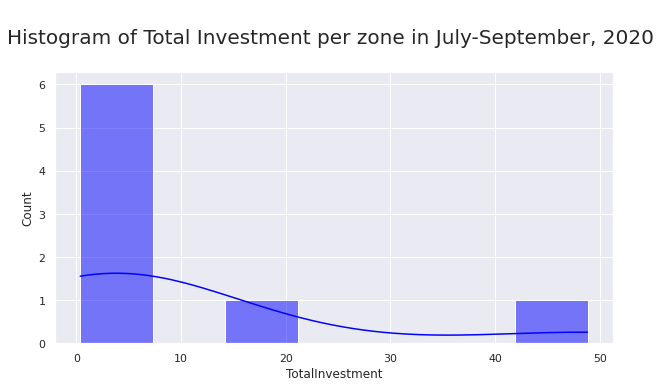

In [14]:
sns.set(rc={'figure.figsize':(10,5)})
p=sns.histplot(zdf["TotalInvestment"],color='blue',stat='count',kde=True,legend=True)
p.axes.set_title("\nHistogram of Total Investment per zone in July-September, 2020 \n",fontsize=20)

### 6.1.1.2. Export Earned

In [15]:
stat, p = stats.normaltest(zdf['ExportEarned'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian')
else:
    print('Sample does not look Gaussian')

Statistics=1.94226, p=0.379
Sample looks Gaussian


Text(0.5, 1.0, '\nHistogram of Total Export Earned per zone in July-September, 2020 \n')

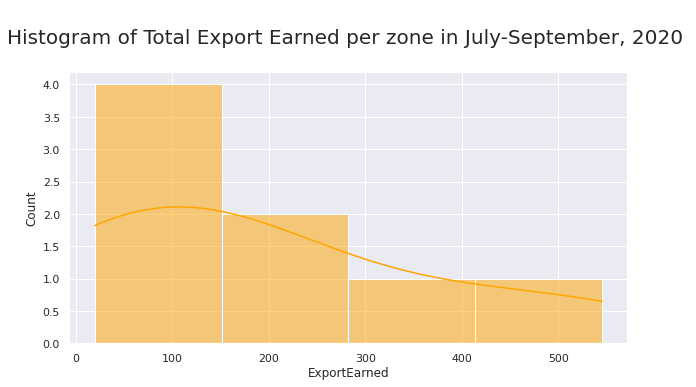

In [16]:
sns.set(rc={'figure.figsize':(10,5)})
p=sns.histplot(zdf['ExportEarned'],color='orange',stat='count',kde=True,legend=True)
p.axes.set_title("\nHistogram of Total Export Earned per zone in July-September, 2020 \n",fontsize=20)

## 6.1.2. Anderson-Darling Test
### 6.1.2.1. ExportEarned

In [17]:
result = stats.anderson(zdf['ExportEarned'])

print('Statistic: %.3f' % result.statistic)

p = 0

for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print(f'Significance level {sl:.2f} % : critical value {cv:.3f}, data looks normal')
    else:
        print(f'Significance level {sl:.2f} % : critical value {cv:.3f}, data does not look normal')

Statistic: 0.412
Significance level 15.00 % : critical value 0.519, data looks normal
Significance level 10.00 % : critical value 0.591, data looks normal
Significance level 5.00 % : critical value 0.709, data looks normal
Significance level 2.50 % : critical value 0.827, data looks normal
Significance level 1.00 % : critical value 0.984, data looks normal


### 6.1.2.1. Total Investment

In [18]:
result = stats.anderson(zdf['TotalInvestment'])

print('Statistic: %.3f' % result.statistic)

p = 0

for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print(f'Significance level {sl:.2f} % : critical value {cv:.3f}, data looks normal')
    else:
        print(f'Significance level {sl:.2f} % : critical value {cv:.3f}, data does not look normal')

Statistic: 1.260
Significance level 15.00 % : critical value 0.519, data does not look normal
Significance level 10.00 % : critical value 0.591, data does not look normal
Significance level 5.00 % : critical value 0.709, data does not look normal
Significance level 2.50 % : critical value 0.827, data does not look normal
Significance level 1.00 % : critical value 0.984, data does not look normal


<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#282f85;overflow:hidden;font-weight:500">EDA, Data Visualization & Insights </div>

# 7. EDA, Data Visualization & Insights
## 7.1 Variables Analysis

## 7.1.1. ZDF numerical distributions

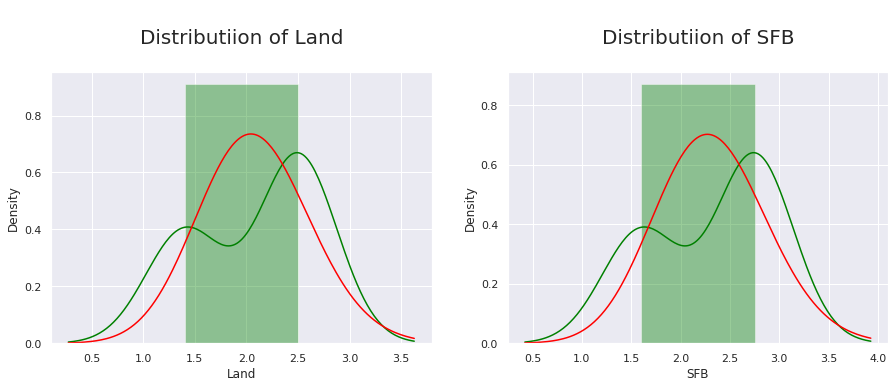

In [19]:
sns.set(rc={'figure.figsize':(15,5)})
for i, column in enumerate(["Land", "SFB"], 1):
    plt.subplot(1,2,i)
    p=sns.distplot(zdf[column],color='green',fit_kws={"color":"red"},fit=stats.gamma, label="label 1")
    p.axes.set_title("\nDistributiion of "+column+"\n",fontsize=20)

Text(0.5, 1.0, '\nDistributiion of Total Investment per zone in July-September, 2020 \n')

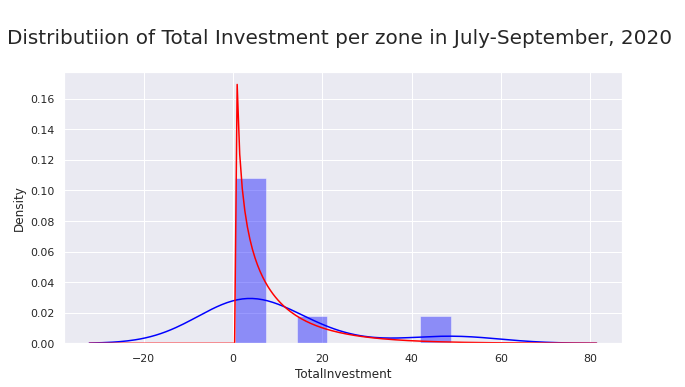

In [20]:
sns.set(rc={'figure.figsize':(10,5)})
p=sns.distplot(zdf["TotalInvestment"],color='blue',fit_kws={"color":"red"},fit=stats.gamma, label="label 1")
p.axes.set_title("\nDistributiion of Total Investment per zone in July-September, 2020 \n",fontsize=20)

Text(0.5, 1.0, '\nDistributiion of Export Earned in July-September, 2020\n')

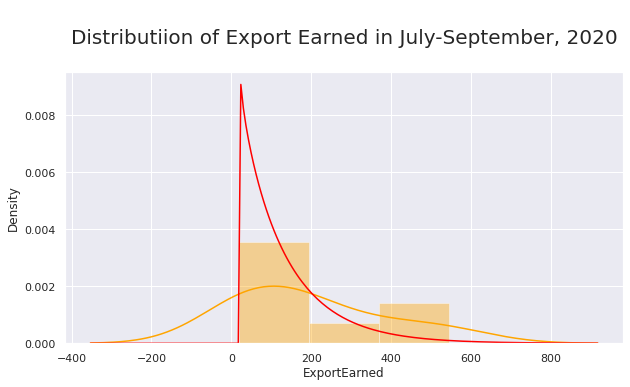

In [21]:
p=sns.distplot(zdf["ExportEarned"],color='orange',fit_kws={"color":"red"},fit=stats.gamma, label="label 1")
p.axes.set_title("\nDistributiion of Export Earned in July-September, 2020\n",fontsize=20)

Text(0.5, 1.0, '\nDistributiion of New Job Opportunity created in July-September, 2020\n')

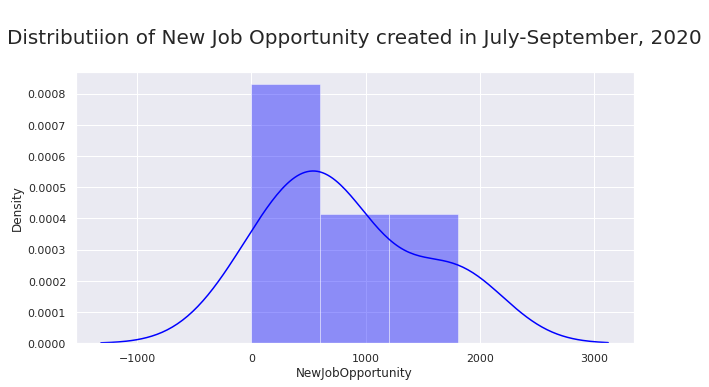

In [22]:
p=sns.distplot(zdf["NewJobOpportunity"],color='blue')
p.axes.set_title("\nDistributiion of New Job Opportunity created in July-September, 2020\n",fontsize=20)

### Insights
- Not properly distributed

## 7.1.2. Number of Enterprizes per zone

Text(0.5, 1.0, '\nNumber of Enterprizes per zone\n')

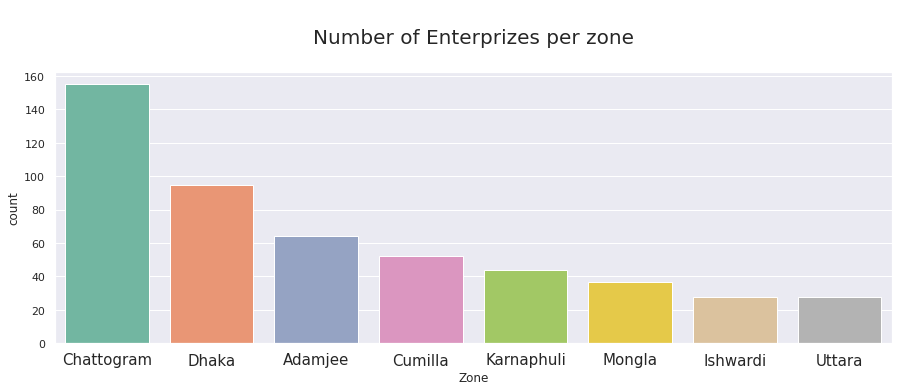

In [23]:
sns.set(rc={'figure.figsize':(15,5)})
plt.xticks(fontsize=15)
p=sns.countplot(df['Zone'],palette="Set2",hue_order=df.groupby('Zone'),order=df.Zone.value_counts().sort_values(ascending=False).index)
p.axes.set_title("\nNumber of Enterprizes per zone\n",fontsize=20)

### Insights
- Chattogram has highest number of factories, then comes Dhaka EPZ

## 7.1.3. Number of Enterprizes per Investing countries

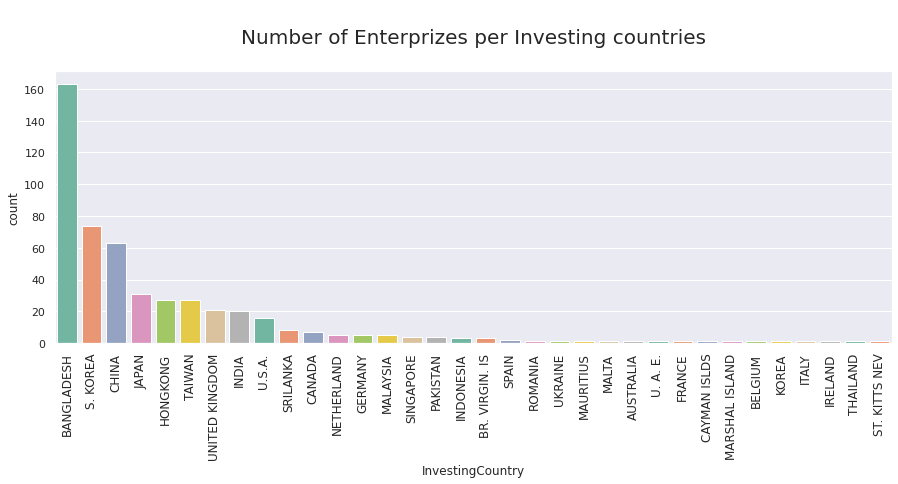

In [24]:
plt.xticks(fontsize=12,rotation='vertical')
p=sns.countplot(df['InvestingCountry'],palette="Set2",hue_order=df.groupby('InvestingCountry'),order=df.InvestingCountry.value_counts().sort_values(ascending=False).index)
p.axes.set_title("\nNumber of Enterprizes per Investing countries\n",fontsize=20);

### Insights
- South Korea and China are the most enterprize investors in Bangladesh EPZs based on Enterprize Numbers.
- They are asian and quite **South-East Asian Countries**.
- The list is followed by Japan, HongKong, Taiwan - all the **South-East Asian Countries**.
- **Bangladesh is a investement place for South-East Asian Countries - which  are RIVALS of Bangladesh in RMG Exports.**

## 7.1.4. Number of Enterprizes per Products

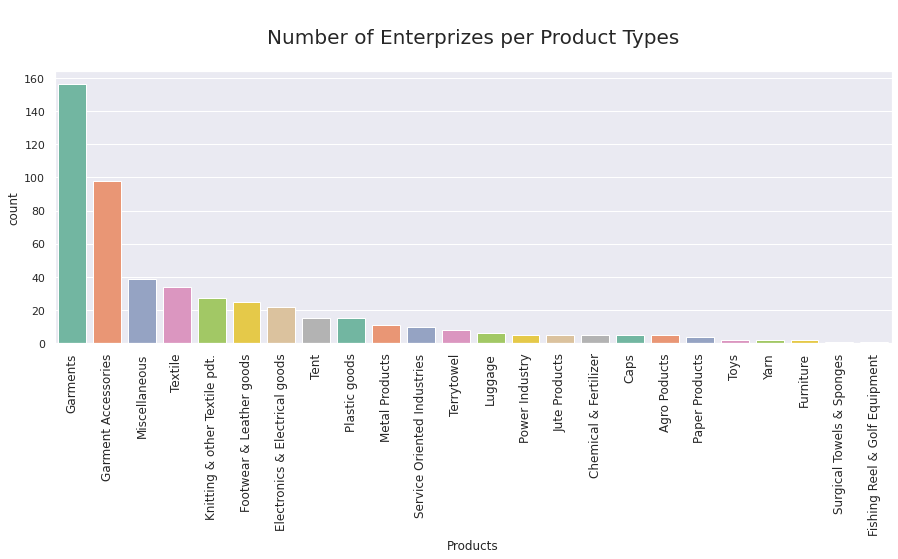

In [25]:
plt.xticks(fontsize=12,rotation='vertical')
p=sns.countplot(df['Products'],palette="Set2",hue_order=df.groupby('Products'),order=df.Products.value_counts().sort_values(ascending=False).index)
p.axes.set_title("\nNumber of Enterprizes per Product Types\n",fontsize=20);

### Insights
- **All Garment related products are on the top**. It is normal as BD is one of the world's Garments LEADER.
- **2nd sector is Footwear** - leather related
- **3rd big one is - Electronics** - which is interesting.

## 7.1.5 Boxplots of ZDF

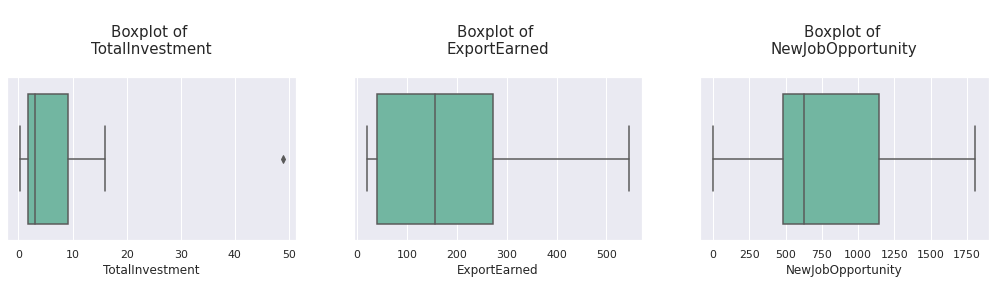

In [26]:
sns.set(rc={'figure.figsize':(30,3)})
for i, column in enumerate(["TotalInvestment", "ExportEarned", "NewJobOpportunity"], 1):
    plt.subplot(1,5,i)
    p= sns.boxplot(zdf[column],palette="Set2");
    p.axes.set_title("\nBoxplot of \n"+column+"\n",fontsize=15)

### Insights
- Export earned from each area differs a lot. But 50% percentile is stable , compared to others.

## 7.1.6 Export Earn per Zone

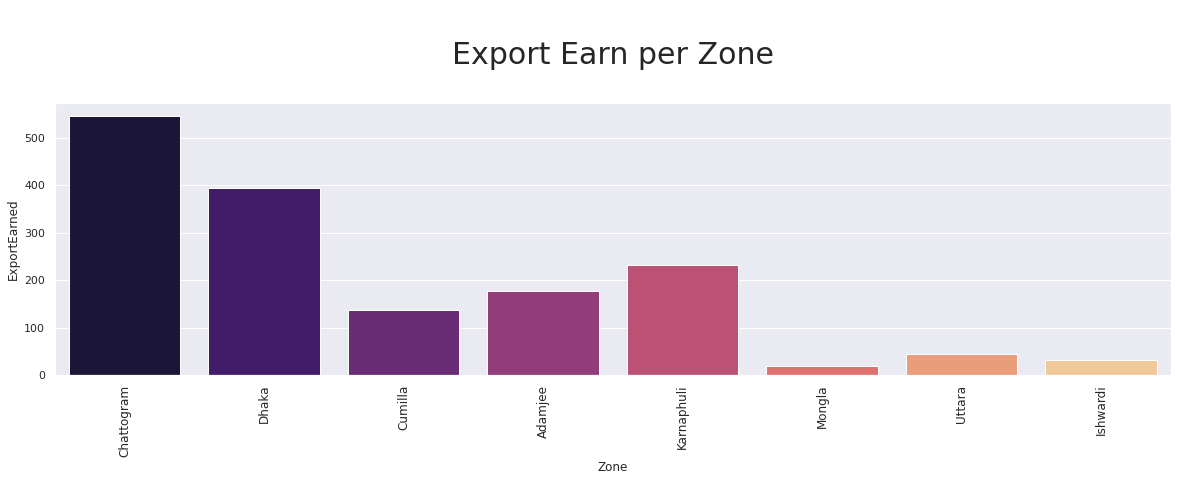

In [27]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=12,rotation='vertical')
p=sns.barplot(x="Zone", y="ExportEarned", data=zdf,palette="magma",capsize=.2)
p.axes.set_title("\nExport Earn per Zone\n",fontsize=30);

### Insights
- Chattogram leads in export earnings.
- Dhaka and Karnaphuli (near to chattogram) follows..

## 7.1.7 Total Investment per Zone

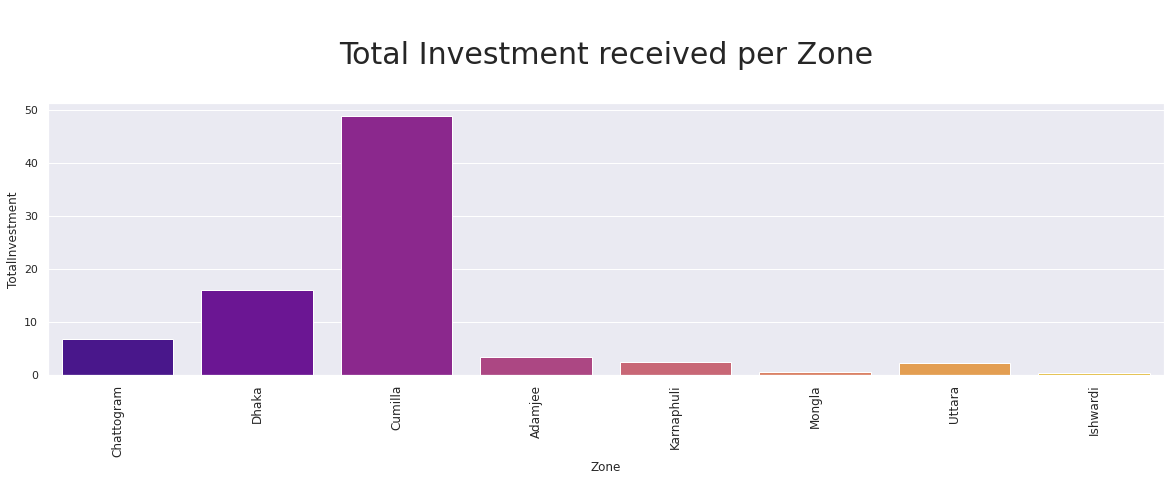

In [28]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=12,rotation='vertical')
p=sns.barplot(x="Zone", y="TotalInvestment", data=zdf,palette="plasma",capsize=.2)
p.axes.set_title("\nTotal Investment received per Zone\n",fontsize=30);

### Insights
- Unexpected rise in Cumilla. Maybe, it was developed newly then.

## 7.2 Co-Relation Analysis
## 7.2.1 Co-Relation Analysis of Number Of Enterprize, Total Investment, Export Earned per zone

In [29]:
export = df.Zone.value_counts().to_frame('CountOfEnterprize').reset_index()
export.rename(columns = {'index':'Zone'}, inplace = True)
export=pd.DataFrame.merge(export,zdf,on='Zone')
export=export.drop(["SFB","Land","NewJobOpportunity"],axis=1)
ex=export.copy()
ex.rename(index={0: 'Chattogram',1:'Dhaka',2:'Adamjee',3:'Cumilla',4:'Karnaphuli',5:'Mongla',6:'Ishwardi',7:'Uttara',}, inplace=True)
ex=ex.drop(["Zone"],axis=1)

Text(0.5, 0.98, '\nVariables and co-relation\n')

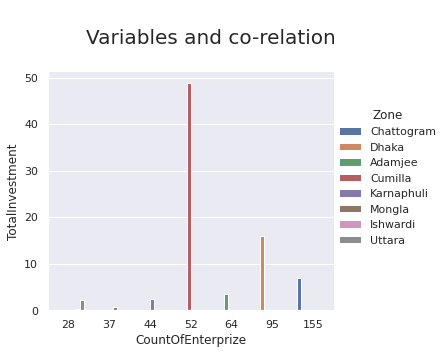

In [30]:
sns.set(rc={'figure.figsize':(20,5)})
g = sns.catplot(x="CountOfEnterprize", y="TotalInvestment",
                hue="Zone",
                data=export, kind="bar");
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('\nVariables and co-relation\n',fontsize=20)

In [31]:
ex.corr()

,CountOfEnterprize,TotalInvestment,ExportEarned
CountOfEnterprize,1.000000,0.093770,0.949863
TotalInvestment,0.093770,1.000000,0.095643
ExportEarned,0.949863,0.095643,1.000000


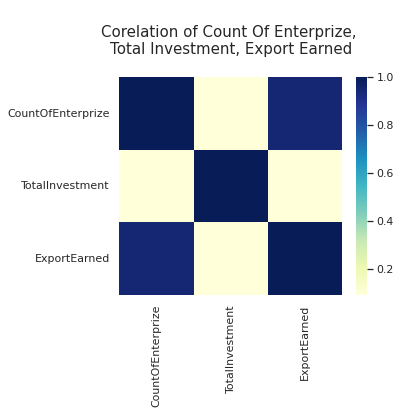

In [32]:
corr=ex.corr()
sns.set(rc={'figure.figsize':(5,4)})
p=sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="YlGnBu")
p=p.axes.set_title("\nCorelation of Count Of Enterprize, \nTotal Investment, Export Earned\n",fontsize=15);

### Insights
- Number of Enterprizes per zone **highly co-relates** with export earned from that zone.
- But there is **no co-relation of number of interprize and total investment** there. So, we can assume there is some big investments in some enterprizes, compared to others; and this is out-numbering the co-relation.

## 7.2.1 Co-Relation Analysis of Number Of Enterprize, SFB, Land per zone

In [33]:
price = df.Zone.value_counts().to_frame('CountOfEnterprize').reset_index()
price.rename(columns = {'index':'Zone'}, inplace = True)
price=pd.DataFrame.merge(price,zdf,on='Zone')
price.rename(index={0: 'Chattogram',1:'Dhaka',2:'Adamjee',3:'Cumilla',4:'Karnaphuli',5:'Mongla',6:'Ishwardi',7:'Uttara',}, inplace=True)
price=price.drop(["Zone","TotalInvestment","ExportEarned","NewJobOpportunity"],axis=1)

### Co-relaton

In [34]:
price.corr()

,CountOfEnterprize,Land,SFB
CountOfEnterprize,1.000000,0.610221,0.610221
Land,0.610221,1.000000,1.000000
SFB,0.610221,1.000000,1.000000


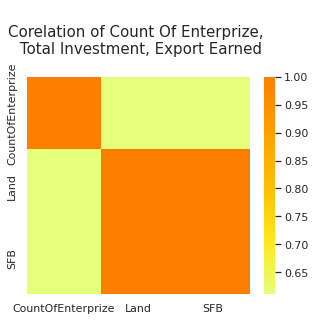

In [35]:
corr=price.corr()
sns.set(rc={'figure.figsize':(5,4)})
p=sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="Wistia")
p=p.axes.set_title("\nCorelation of Count Of Enterprize, \n Total Investment, Export Earned\n",fontsize=15)

### Insights
- Although they corelates, I am not actually sure about it.

#### Assumption:
- Maybe, high priced area has better export facilities, and thats why, investors are investing there, inmstead of low-priced areas with less facilities.

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#282f85;overflow:hidden;font-weight:500">Multivariate Analysis </div>

# 8. Multivariate Analysis

## 8.1. Multicollinearity (Kruskal–Wallis)
For categorical and a continuous variable, multicollinearity can be measured by t-test (if the categorical variable has 2 categories, parametric) or ANOVA (more than 2 categories, parametric)

Kruskal–Wallis test is more commonly used when we have three or more levels. For two levels, the Mann Whitney U Test is appropriate

The parametric equivalent of the Kruskal–Wallis test is the one-way analysis of variance (ANOVA)

In [36]:
stat, p = stats.kruskal(ex['ExportEarned'], ex['TotalInvestment'], ex['CountOfEnterprize'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

for alpha in [0.001,0.05,0.01,0.03,0.05,0.1,0.2,0.5]:
    if p > alpha:
        print("Alpha:",alpha,' -- Same distributions')
    else:
        print("Alpha:",alpha,' -- Different distributions')

Statistics=13.101, p=0.001
Alpha: 0.001  -- Same distributions
Alpha: 0.05  -- Different distributions
Alpha: 0.01  -- Different distributions
Alpha: 0.03  -- Different distributions
Alpha: 0.05  -- Different distributions
Alpha: 0.1  -- Different distributions
Alpha: 0.2  -- Different distributions
Alpha: 0.5  -- Different distributions


### Insights
- Actually, they doesn't have same same distributions.

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#282f85;overflow:hidden;font-weight:500">Map-ploting with Geopandas</div>

# 9. Map-ploting with Geopandas

In this section, we will plot the country-wise invetment data into a world map and try to visualize from which area/region/continent/sub-continent, most of the investments are coming to angladesh EPZs.

In [37]:
import geopandas as gpd
gdf = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))

In [38]:
country = df.InvestingCountry.value_counts().to_frame('CountOfEnterprize').reset_index()
country.rename(columns = {'index':'Country'}, inplace = True)
data=country.copy()
cc['Country']=cc['Country'].str.lower()

cclist=[]

for i in range(34):
    if data["Country"][i].lower() in list(cc['Country']):
        indx=list(cc['Country']).index(data["Country"][i].lower())
        data["Country"][i]=cc['Alpha-3 code'][indx]
        cclist.append((cc['Alpha-3 code'][indx],data['CountOfEnterprize'][i]))
data=pd.DataFrame(cclist,columns=['Country','Count'])

##### Log Transformation

In [39]:
data['Count'] = np.log2(data['Count'])

In [40]:
merged = gdf.merge(data, left_on = 'iso_a3', right_on = 'Country', how='left')
merged['Count'] = merged['Count'].fillna(0)
merged_json = json.loads(merged.to_json())
json_data = json.dumps(merged_json)

In [41]:
def plot_map(json_data,plot_col,title):

    geosource = GeoJSONDataSource(geojson = json_data)

    #Define a sequential multi-hue color palette.
    palette = brewer['Reds'][8]
    palette = palette[::-1]
    color_mapper = LinearColorMapper(palette = palette, low = 0, high = 7.5)


    color_bar = ColorBar(color_mapper=color_mapper, label_standoff=16,width = 500, height = 10,
    border_line_color=None,location = (0,0), orientation = 'horizontal')

    p = figure(title = title, plot_height = 500 , plot_width = 800, toolbar_location = None)
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None

    p.patches('xs','ys', source = geosource,fill_color = {'field' :plot_col, 'transform' : color_mapper},
              line_color = 'black', line_width = 0.01, fill_alpha = 1)

    p.add_layout(color_bar, 'below')

    output_notebook()

    #Display figure.
    show(p)

In [42]:
plot_map(json_data,'Count','Countries based on investment number (log Transformed)')

Loading BokehJS ...

### Insights
- South & South East Asian dominance.

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#282f85;overflow:hidden;font-weight:500">Conclusions</div>

# 10. Conclusions

From the above analysis, we can conclude:
1. Export number **positively relates** to number of factories.
2. Number of companies per zone is **positively corelated** with price point, which is interestng.
3. **Investment is irregular**. Maybe, some EPZs were newly built, and getting heavy investments.
4. **Chattogram, Dhaka (Capital City), and Karnaphuli (near to Chattogram) leads in export**. Reason can be, the main seaport of Bangladesh is in Chattogram.
5. Adamgee had no new job offerings, no we can assume it is old, and functioning properly - though there is some new investments.
6. **Garments and garments related sectors** leads in company types. Following by **leather-footwares and electronics** at a good distance.
7. **South Korea and China** are the most enterprize investors in Bangladesh EPZs based on Enterprize Numbers. The list is followed by **Japan, HongKong, Taiwan** - all the **South-East Asian Countries**. Bangladesh is a investement place for South-East Asian Countries - which  are RIVALS of Bangladesh in RMG Exports. So, this is quite interesting.
8. Chattogram has largest number of factories.

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#282f85;overflow:hidden;font-weight:500">References</div>

# 11. References
- Notebooks of [Ahmed Shahriar Sakib](https://www.kaggle.com/ahmedshahriarsakib)
- [Python Statistics Fundamentals: How to Describe Your Data](https://realpython.com/python-statistics/)
- [Statistics in Python](https://scipy-lectures.org/packages/statistics/index.html)
- [The easiest way to plot data from Pandas on a world map](https://towardsdatascience.com/the-easiest-way-to-plot-data-from-pandas-on-a-world-map-1a62962a27f3)
- [Geopandas: how to plot countries/cities?](https://stackoverflow.com/questions/65064137/geopandas-how-to-plot-countries-cities)

<div style="padding:50px;color:white;margin:70;font-size:500%;text-align:center;display:fill;border-radius:20px;background-color:#282c5c;overflow:hidden;font-weight:800">Support, Upvote, Fork, Share, Comment</div>